<a href="https://colab.research.google.com/github/RubenCedillo123/Machine-Learning/blob/main/CedilloRuben_T08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Librerías***

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import time
from PIL import Image

# ***Base de Datos***

In [ ]:
dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"].astype(int) #aseguremosnos que las etiquetas son enteros y no cadenas de texto

#solo para visualizar la base de datos
df = pd.DataFrame(X)
df["target"] = y
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


## ***Ánalisis de los Datos y Visualización***

In [ ]:
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Dígitos únicos:", np.unique(y))

Forma de X: (70000, 784)
Forma de y: (70000,)
Dígitos únicos: [0 1 2 3 4 5 6 7 8 9]


* Entonces tenemos 70,000 imagenes de dígitos escritas a mano

  * En X tenemos 70,000 imagenes de 28x28 píxeles aplanados a un vector de 784 entradas.

  * En y tenemos las labels de que dígito es el que esta representado en su forma matricial, es decir tenemos como identificar si es [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

* **Vamos a vizualizar algunos de los dígitos:**

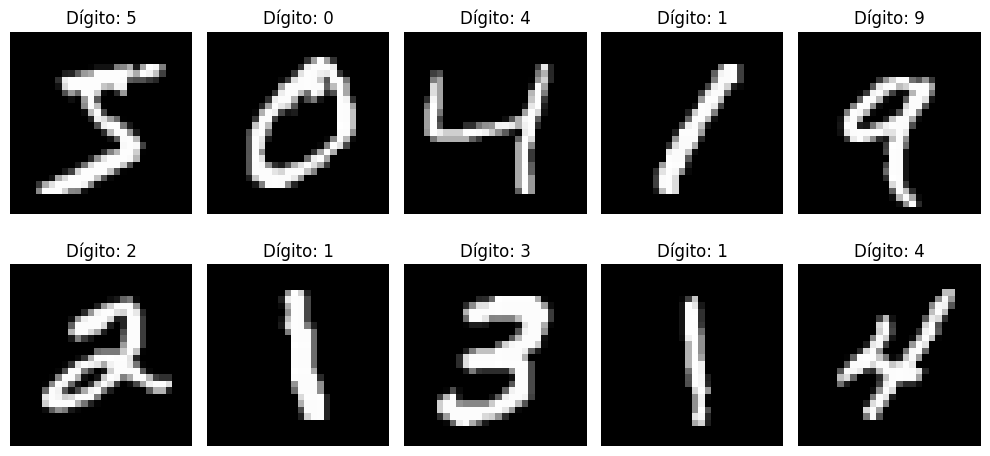

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Dígito: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# ***Árboles y Bosques para el Conjunto MNIST***

* A continuación seguimos los pasos dados en clase para entrenar los modelos de predicción para el conjunto:

## ***1. Subconjunto MNIST***

* Seleccionamos solo los primeros 2,000 dígitos

In [ ]:
df_2000 = df.iloc[:2000]
df_2000

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## ***2. Conjuntos de Entrenamiento y Prueba***

* Creamos un conjunto de entrenamiento y otro de prueba, seleccionando 1,500 dígitos para el entrenamiento y 500 para la validación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_2000.drop("target", axis=1), df_2000["target"], test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(1500, 784) (500, 784)


## ***3. Árbol de Decisión***

* Entrenamos un árbol de decisión simple

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
clf_time = time.time() - start_time


y_pred = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, y_pred)

print("La precisión del árbol simple es:", clf_accuracy)
print("Tiempo de entrenamiento:", clf_time, "segundos")

La precisión del árbol simple es: 0.722
Tiempo de entrenamiento: 0.26900196075439453 segundos


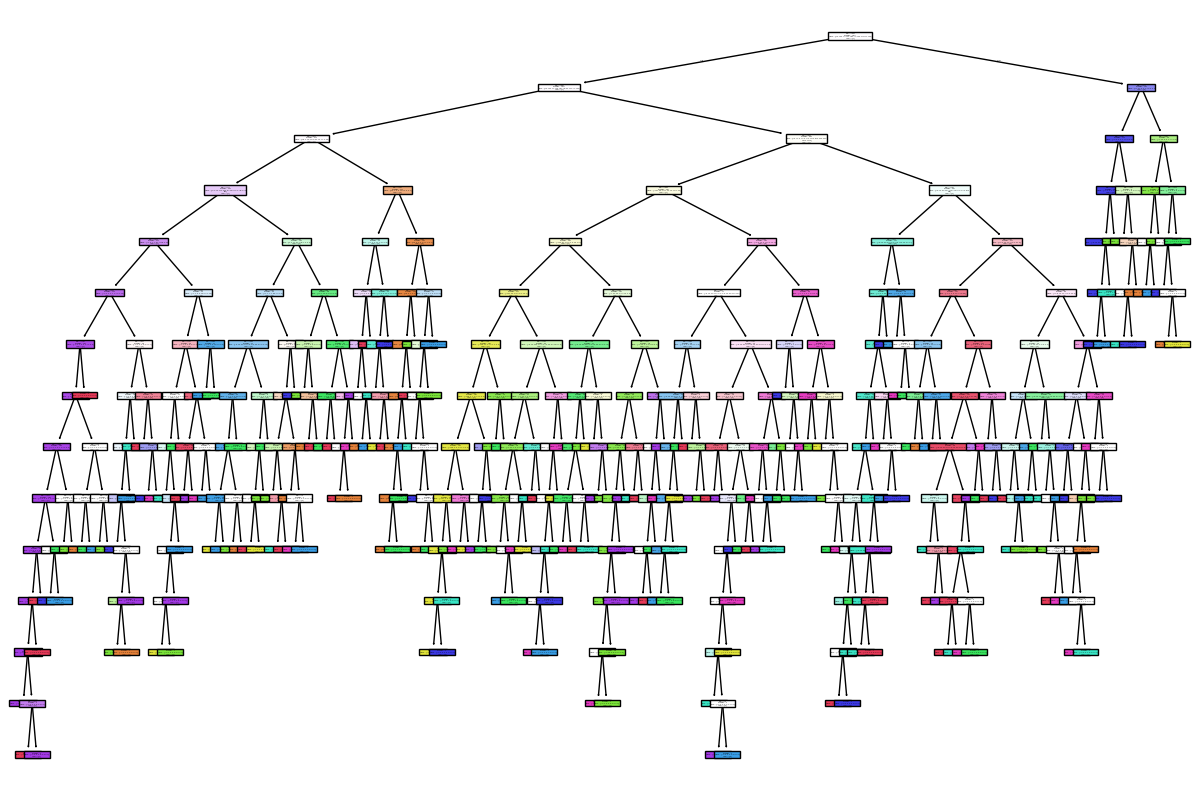

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=df_2000.columns[:-1], class_names=True)
plt.show()

## ***4. Gradient Boosting***

* Con el metodo $Gradient$ $Boosting$ realizamos la tarea de entrenamiento y predicción usando los aprametros:

  * $n$_$estimators = 100$

  * $learning$_$rate = 0.1$

In [ ]:
start_time = time.time()
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_time = time.time() - start_time

y_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)

print("La precisión del Gradient Boosting es:", gb_accuracy)
print("Tiempo de entrenamiento:", gb_time, "segundos")

La precisión del Gradient Boosting es: 0.88
Tiempo de entrenamiento: 77.99913907051086 segundos


## ***5. Random Forest***

* Ahora construimos un $Random$ $Forest$ para la misma tarea

In [ ]:
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start_time

y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)

print("La precisión del Random Forest es:", rf_accuracy)
print("Tiempo de entrenamiento:", rf_time, "segundos")

La precisión del Random Forest es: 0.916
Tiempo de entrenamiento: 0.8761279582977295 segundos


## ***6. Comparación***

* Agrupamos en una tabla todos los resultados para una comparación más directa

In [ ]:
df_resultados = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Gradient Boosting", "Random Forest"],
    "Precisión": [clf_accuracy, gb_accuracy, rf_accuracy],
    "Tiempo de Entrenamiento (segundos)": [clf_time, gb_time, rf_time]
})

df_resultados

,Modelo,Precisión,Tiempo de Entrenamiento (segundos)
0,Árbol de Decisión,0.722,0.269002
1,Gradient Boosting,0.880,77.999139
2,Random Forest,0.916,0.876128


* El mejor de los metodos para esta tarea es el $random$ $forest$

  + Tuvo un accuracy muy superior respecto a los demas
  + Su timepo de entrenamiento aunque más tardado que el árbol de decisión no es tan exagerado como el del $gradient$ $boosting$

## ***7. Rendimiento dado "$n$_$estimators$"***

* Construimos tantos bosques aleatorios como $n$_$estimators$ para poder mirar su evolución conforme la cantidad de árboles aumentan.

In [ ]:
estimadores = range(10, 110, 10)
precisiones = []

start_time = time.time()
for n in estimadores:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    precisiones.append(accuracy_score(y_test, clf.predict(X_test)))
arboles100_time = time.time() - start_time

* Lo visualizamos

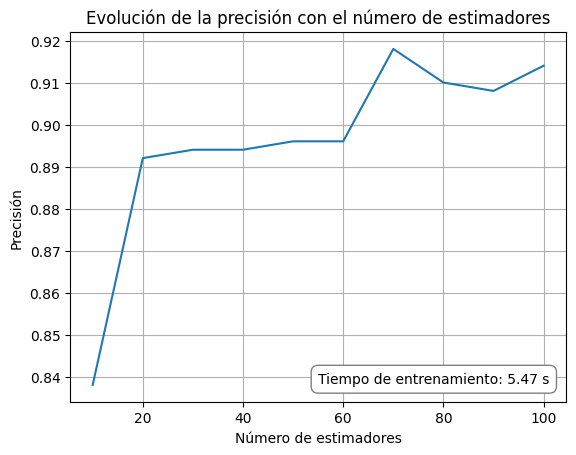

In [ ]:
plt.plot(estimadores, precisiones)
plt.xlabel('Número de estimadores')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión con el número de estimadores')
plt.grid(True)

plt.text(
    x=0.5,
    y=0.05,
    s=f"Tiempo de entrenamiento: {arboles100_time:.2f} s",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()

* ¿Y para 1,000 árboles?

In [ ]:
estimadores_2 = range(10, 1010, 10)
precisiones_2 = []

start_time = time.time()
for n in estimadores_2:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    precisiones_2.append(accuracy_score(y_test, clf.predict(X_test)))
arboles1000_time = time.time() - start_time

+ Precision maxima

In [ ]:
indice_max_prec = np.argmax(precisiones_2)
mejor_estimadores = estimadores_2[indice_max_prec]
mejor_precision = precisiones_2[indice_max_prec]


print(f"El número de estimadores con la precisión máxima es: {mejor_estimadores}")
print(f"La precisión máxima es: {mejor_precision:.4f}")

El número de estimadores con la precisión máxima es: 410
La precisión máxima es: 0.9260


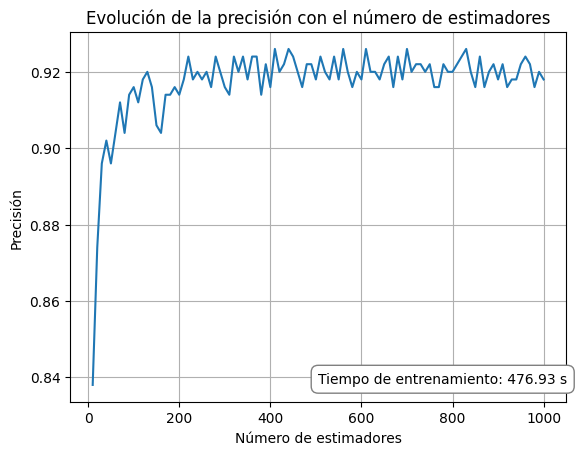

In [ ]:
plt.plot(estimadores_2, precisiones_2)
plt.xlabel('Número de estimadores')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión con el número de estimadores')
plt.grid(True)

plt.text(
    x=0.5,
    y=0.05,
    s=f"Tiempo de entrenamiento: {arboles1000_time:.2f} s",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()

* La opción más optima de trabajo es con n_estimators = 100

## ***8. Importancia por Característica***

* Vamos a revisar la importancia de las características

In [ ]:
importances = rf.feature_importances_
importances

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.99480234e-05, 0.00000000e+00,
       6.19289774e-05, 0.00000000e+00, 6.50314928e-05, 1.41145189e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

## ***9. Visualización, Random Forest***

* Del anterior vector obtenemos nuestra matriz de 28x28 para poder visualizar las importancias de todos los dígitos

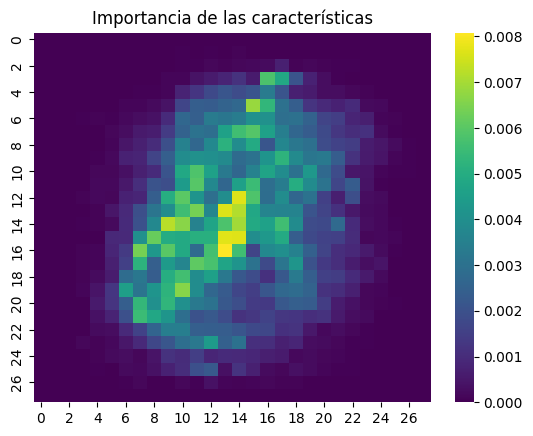

In [ ]:
importances = rf.feature_importances_
sns.heatmap(importances.reshape(28, 28), cmap='viridis')
plt.title('Importancia de las características')
plt.show()

* ¿Y solo para 1 y 0?

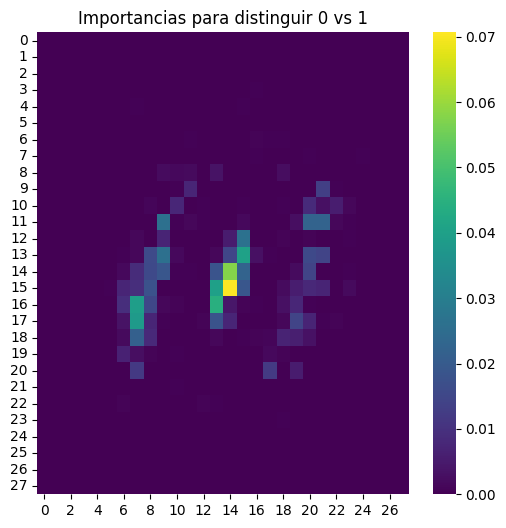

In [ ]:
# Filtra solo ceros y unos
mask = (y_train == 0) | (y_train == 1)
X_bin = X_train[mask]
y_bin = y_train[mask]


clf_bin = RandomForestClassifier(n_estimators=100, random_state=42)
clf_bin.fit(X_bin, y_bin)

importances_bin = clf_bin.feature_importances_.reshape(28, 28)
plt.figure(figsize=(6,6))
sns.heatmap(importances_bin, cmap='viridis')
plt.title('Importancias para distinguir 0 vs 1')
plt.show()


# ***Predicción con Imagen Propia***

* Vamos a cargar la imagen propia y la del profesor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def cargar_imagen(path):
  img = Image.open(path).convert("L")
  img = img.resize((28, 28))
  img_array = np.array(img)
  if img_array.mean() > 127:
    img_array = 255 - img_array
  img_flat = img_array.reshape(1, -1)
  return img_flat, img_array

* Para el dígito del profesor

In [ ]:
path_s3 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/numero3.jpg"

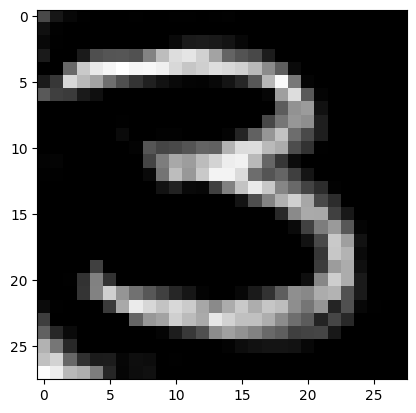

In [ ]:
X_s3, img_vis_s3 = cargar_imagen(path_s3)
plt.imshow(img_vis_s3, cmap='gray')

* Para el dígito propio

In [ ]:
path_r2 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/numero2.jpg"

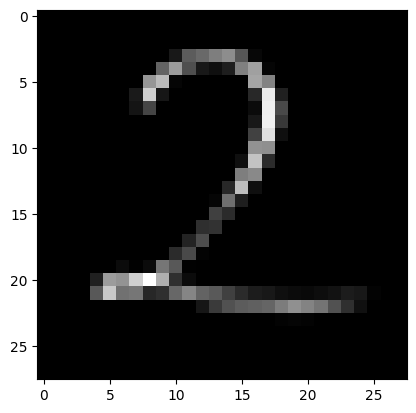

In [ ]:
X_r2, img_vis_r2 = cargar_imagen(path_r2)
plt.imshow(img_vis_r2, cmap='gray')

* Vamos a dibujar algunos ejemplos de los dígitos del 3 y del 2 del conjunto MNIST y comparemoslos con los que dibujamos

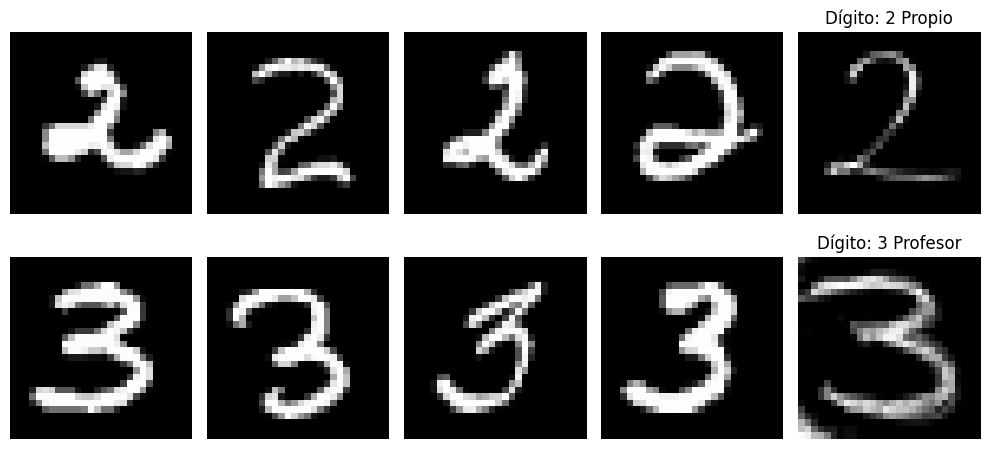

In [ ]:
dos = df_2000[df_2000["target"] == 2].sample(5)
tres = df_2000[df_2000["target"] == 3].sample(5)

plt.figure(figsize=(10, 10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    # Reshape only the pixel values, excluding the target column
    plt.imshow(dos.iloc[i].values[:-1].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    # Reshape only the pixel values, excluding the target column
    plt.imshow(tres.iloc[i].values[:-1].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(img_vis_r2, cmap='gray')
plt.title(f"Dígito: 2 Propio")
plt.axis('off')

plt.subplot(2, 5, 10)
plt.imshow(img_vis_s3, cmap='gray')
plt.title(f"Dígito: 3 Profesor")
plt.axis('off')

plt.tight_layout()
plt.show()

#nota: es mejor aumentar el grosor del trazo

In [ ]:
X_r2_df = pd.DataFrame(X_r2, columns=X_train.columns)
X_s3_df = pd.DataFrame(X_s3, columns=X_train.columns)

prediccion_r2 = rf.predict(X_r2_df)
prediccion_s3 = rf.predict(X_s3_df)


print("La predicción para el dígito propio es:", prediccion_r2[0])
print("La predicción para el dígito del profesor es:", prediccion_s3[0])

La predicción para el dígito propio es: 2
La predicción para el dígito del profesor es: 3


* En esta ocasión el $random$ $forest$ acerto en ambas predicciones

# ***Ejercicios***

## ***1. Random Forest Classifier por Dígito***

* En esta ocasión usaremos todo el conjunto MNIST para entrenar nuestros $Random$ $Forest$ especializados por dígito

* Además usaremos 60,000 datos para el entranimiento. y 10,000 para el test

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=10000 , random_state=42)

* Ahora hacemos un $Random$ $ Forest$ especializado en la identificación de un dígito

* **Para el 0**

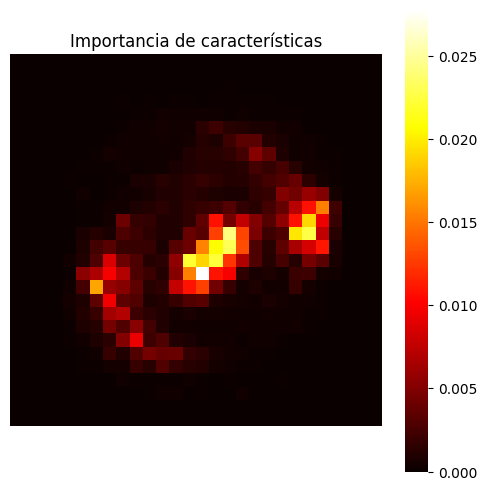

In [ ]:
#Con esto hacemos que el modelo se especialice en identificar ceros

y_train_binario_cero = (y_train_c == 0)
y_test_binario_cero = (y_test_c == 0)

#Entrenamos el modelo y obtenemos su precisión
clf_cero = RandomForestClassifier(n_estimators=100, random_state=42)
clf_cero.fit(X_train_c, y_train_binario_cero)
precision_cero = accuracy_score(y_test_binario_cero, clf_cero.predict(X_test_c))


#Visualizamos las importancias
importancias_cero = clf_cero.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_cero.reshape(28, 28), cmap='hot', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')

plt.show()

* **Para el 1**

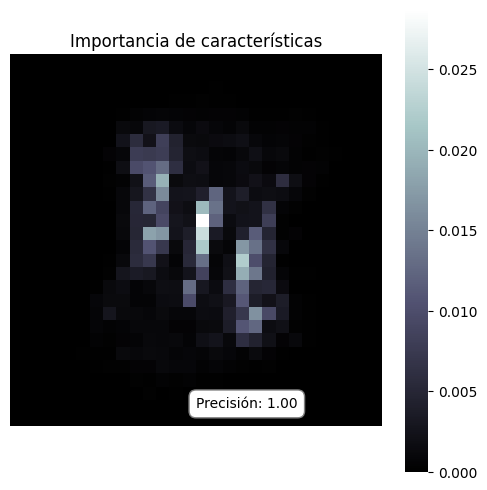

In [ ]:
y_train_binario_uno = (y_train_c == 1)
y_test_binario_uno = (y_test_c == 1)

#Entrenamos el modelo y obtenemos su precisión
clf_uno = RandomForestClassifier(n_estimators=100, random_state=42)
clf_uno.fit(X_train_c, y_train_binario_uno)
precision_uno = accuracy_score(y_test_binario_uno, clf_uno.predict(X_test_c))

#Importancias
importancias_uno = clf_uno.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_uno.reshape(28, 28), cmap='bone', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_uno:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 2**

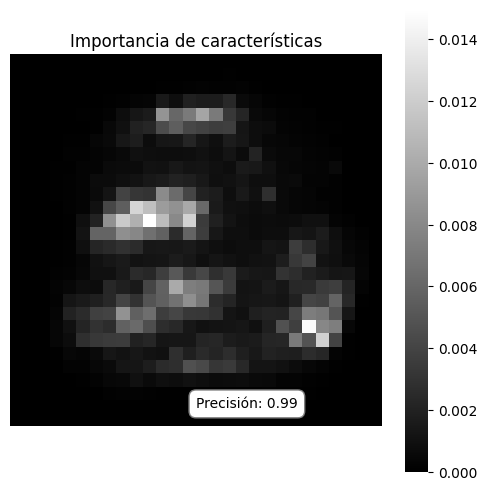

In [ ]:
y_train_binario_dos = (y_train_c == 2)
y_test_binario_dos = (y_test_c == 2)

#Entrenamos el modelo y obtenemos su precisión
clf_dos = RandomForestClassifier(n_estimators=100, random_state=42)
clf_dos.fit(X_train_c, y_train_binario_dos)
precision_dos = accuracy_score(y_test_binario_dos, clf_dos.predict(X_test_c))

#Importancias
importancias_dos = clf_dos.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_dos.reshape(28, 28), cmap='gray', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_dos:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 3**

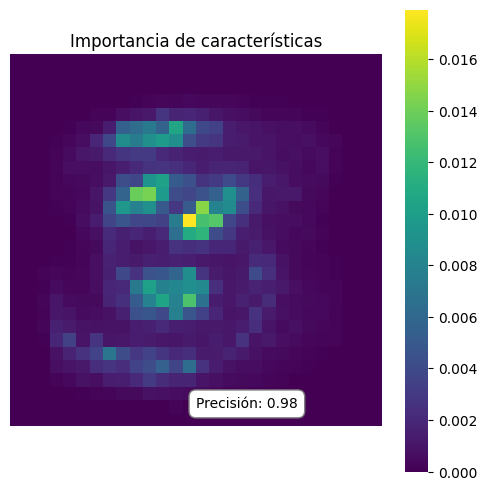

In [ ]:
y_train_binario_tres = (y_train_c == 3)
y_test_binario_tres = (y_test_c == 3)

#Entrenamos el modelo y obtenemos su precisión
clf_tres = RandomForestClassifier(n_estimators=100, random_state=42)
clf_tres.fit(X_train_c, y_train_binario_tres)
precision_tres = accuracy_score(y_test_binario_tres, clf_tres.predict(X_test_c))

#Importancias
importancias_tres = clf_tres.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_tres.reshape(28, 28), cmap='viridis', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_tres:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 4**

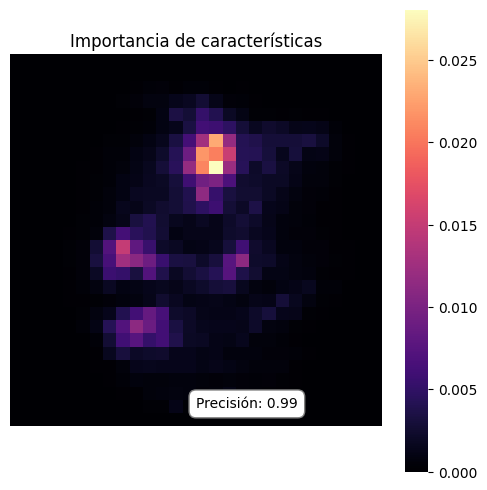

In [ ]:
y_train_binario_cuatro = (y_train_c == 4)
y_test_binario_cuatro = (y_test_c == 4)

#Entrenamos el modelo y obtenemos su precisión
clf_cuatro = RandomForestClassifier(n_estimators=100, random_state=42)
clf_cuatro.fit(X_train_c, y_train_binario_cuatro)
precision_cuatro = accuracy_score(y_test_binario_cuatro, clf_cuatro.predict(X_test_c))

#Importancias
importancias_cuatro = clf_cuatro.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_cuatro.reshape(28, 28), cmap='magma', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_cuatro:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 5**

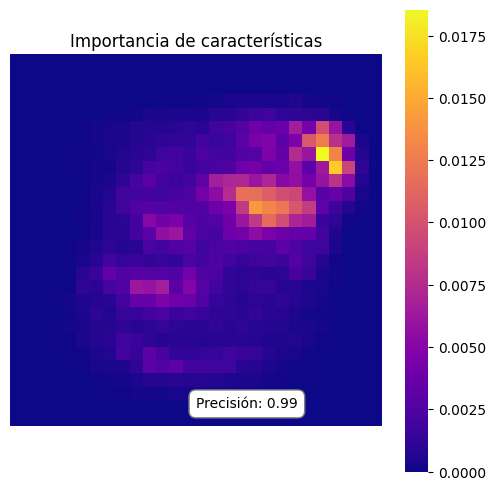

In [ ]:
y_train_binario_cinco = (y_train_c == 5)
y_test_binario_cinco = (y_test_c == 5)

#Entrenamos el modelo y obtenemos su precisión
clf_cinco = RandomForestClassifier(n_estimators=100, random_state=42)
clf_cinco.fit(X_train_c, y_train_binario_cinco)
precision_cinco = accuracy_score(y_test_binario_cinco, clf_cinco.predict(X_test_c))

#Importancias
importancias_cinco = clf_cinco.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_cinco.reshape(28, 28), cmap='plasma', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_cinco:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 6**

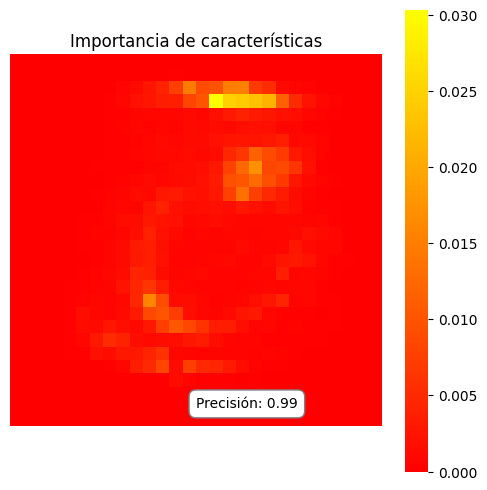

In [ ]:
y_train_binario_seis = (y_train_c == 6)
y_test_binario_seis = (y_test_c == 6)

#Entrenamos el modelo y obtenemos su precisión
clf_seis = RandomForestClassifier(n_estimators=100, random_state=42)
clf_seis.fit(X_train_c, y_train_binario_seis)
precision_seis = accuracy_score(y_test_binario_seis, clf_seis.predict(X_test_c))

#Importancias
importancias_seis = clf_seis.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_seis.reshape(28, 28), cmap='autumn', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_seis:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 7**

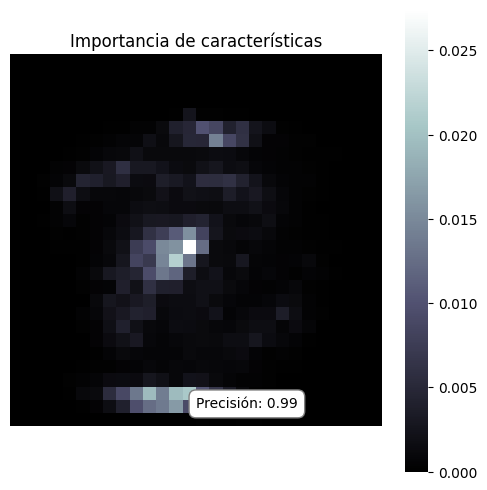

In [ ]:
y_train_binario_siete = (y_train_c == 7)
y_test_binario_siete = (y_test_c == 7)

#Entrenamos el modelo y obtenemos su precisión
clf_siete = RandomForestClassifier(n_estimators=100, random_state=42)
clf_siete.fit(X_train_c, y_train_binario_siete)
precision_siete = accuracy_score(y_test_binario_siete, clf_siete.predict(X_test_c))

#Importancias
importancias_siete = clf_siete.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_siete.reshape(28, 28), cmap='bone', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_siete:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 8**

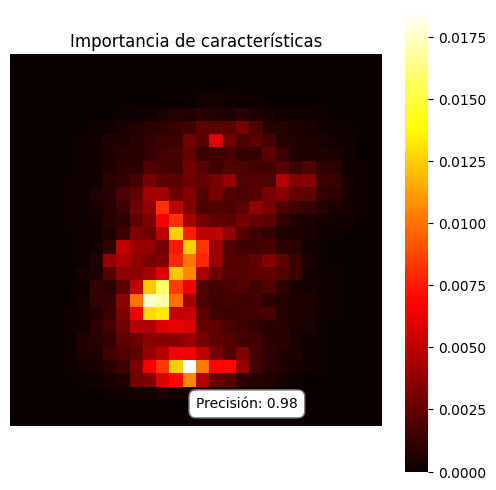

In [ ]:
y_train_binario_ocho = (y_train_c == 8)
y_test_binario_ocho = (y_test_c == 8)

#Entrenamos el modelo y obtenemos su precisión
clf_ocho = RandomForestClassifier(n_estimators=100, random_state=42)
clf_ocho.fit(X_train_c, y_train_binario_ocho)
precision_ocho = accuracy_score(y_test_binario_ocho, clf_ocho.predict(X_test_c))

importancias_ocho = clf_ocho.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_ocho.reshape(28, 28), cmap='hot', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_ocho:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

* **Para el 9**

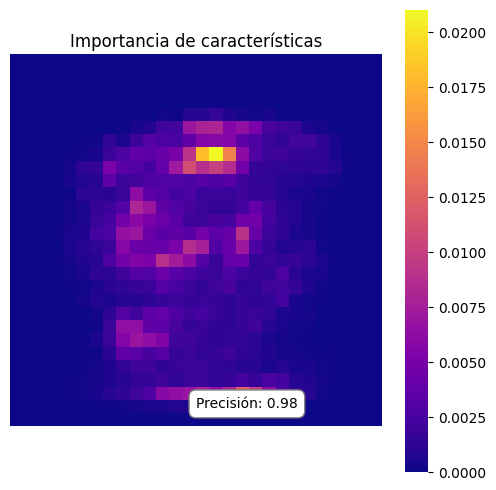

In [ ]:
y_train_binario_nueve = (y_train_c == 9)
y_test_binario_nueve = (y_test_c == 9)

#Entrenamos el modelo y obtenemos su precisión
clf_nueve = RandomForestClassifier(n_estimators=100, random_state=42)
clf_nueve.fit(X_train_c, y_train_binario_nueve)
precision_nueve = accuracy_score(y_test_binario_nueve, clf_nueve.predict(X_test_c))

importancias_nueve = clf_nueve.feature_importances_
plt.figure(figsize=(6, 6))
sns.heatmap(importancias_nueve.reshape(28, 28), cmap='plasma', square=True, cbar=True)
plt.title('Importancia de características')
plt.axis('off')
plt.text(
    x=0.5,
    y=0.05,
    s=f"Precisión: {precision_nueve:.2f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.show()

## ***2. Predicción para Dígitos Propios***

* Cargamos los diez dígitos

In [ ]:
path_0 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/0.jpg"
path_1 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/1.jpg"
path_2 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/2.jpg"
path_3 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/3.jpg"
path_4 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/4.jpg"
path_5 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/5.jpg"
path_6 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/6.jpg"
path_7 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/7.jpg"
path_8 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/8.jpg"
path_9 = "/content/drive/MyDrive/Colab Notebooks/TS Física Computacional III/Práctica 8/9.jpg"

imagenes = [path_0, path_1, path_2, path_3, path_4, path_5, path_6, path_7, path_8, path_9]

* Le damos formato a cada imagen

In [ ]:
X_0, img_vis_0 = cargar_imagen(path_0)
X_1, img_vis_1 = cargar_imagen(path_1)
X_2, img_vis_2 = cargar_imagen(path_2)
X_3, img_vis_3 = cargar_imagen(path_3)
X_4, img_vis_4 = cargar_imagen(path_4)
X_5, img_vis_5 = cargar_imagen(path_5)
X_6, img_vis_6 = cargar_imagen(path_6)
X_7, img_vis_7 = cargar_imagen(path_7)
X_8, img_vis_8 = cargar_imagen(path_8)
X_9, img_vis_9 = cargar_imagen(path_9)

* Visualizamos nuestras imagenes

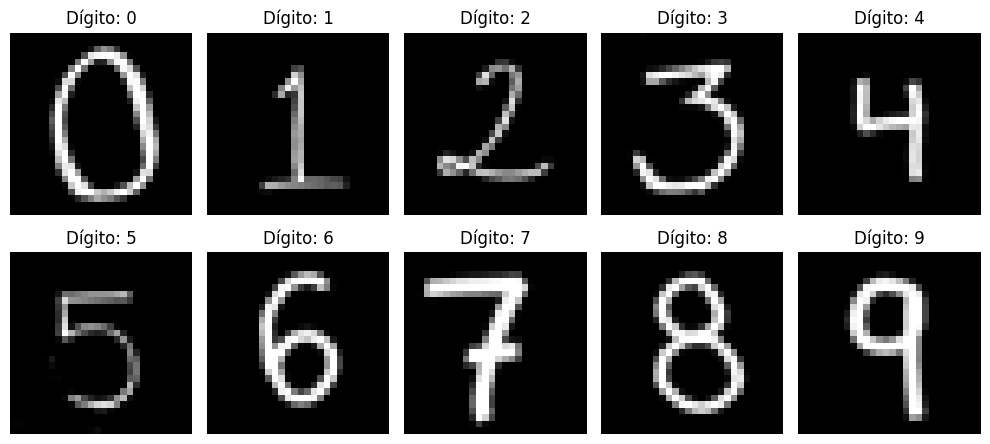

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 5, 1)
plt.imshow(img_vis_0, cmap='gray')
plt.title(f"Dígito: 0")
plt.axis('off')

plt.subplot(2, 5, 2)
plt.imshow(img_vis_1, cmap='gray')
plt.title(f"Dígito: 1")
plt.axis('off')

plt.subplot(2, 5, 3)
plt.imshow(img_vis_2, cmap='gray')
plt.title(f"Dígito: 2")
plt.axis('off')

plt.subplot(2, 5, 4)
plt.imshow(img_vis_3, cmap='gray')
plt.title(f"Dígito: 3")
plt.axis('off')

plt.subplot(2, 5, 5)
plt.imshow(img_vis_4, cmap='gray')
plt.title(f"Dígito: 4")
plt.axis('off')

plt.subplot(1,5,1)
plt.imshow(img_vis_5, cmap='gray')
plt.title(f"Dígito: 5")
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(img_vis_6, cmap='gray')
plt.title(f"Dígito: 6")
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(img_vis_7, cmap='gray')
plt.title(f"Dígito: 7")
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(img_vis_8, cmap='gray')
plt.title(f"Dígito: 8")
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(img_vis_9, cmap='gray')
plt.title(f"Dígito: 9")
plt.axis('off')

plt.tight_layout()
plt.show()

* Ahora pidamosle a cada $random$ $forest$ especializado que nos diga que dígito esta reconociendo

In [ ]:
X_0_df = pd.DataFrame(X_0, columns=X_train_c.columns)
X_1_df = pd.DataFrame(X_1, columns=X_train_c.columns)
X_2_df = pd.DataFrame(X_2, columns=X_train_c.columns)
X_3_df = pd.DataFrame(X_3, columns=X_train_c.columns)
X_4_df = pd.DataFrame(X_4, columns=X_train_c.columns)
X_5_df = pd.DataFrame(X_5, columns=X_train_c.columns)
X_6_df = pd.DataFrame(X_6, columns=X_train_c.columns)
X_7_df = pd.DataFrame(X_7, columns=X_train_c.columns)
X_8_df = pd.DataFrame(X_8, columns=X_train_c.columns)
X_9_df = pd.DataFrame(X_9, columns=X_train_c.columns)

X_n = [X_0_df, X_1_df, X_2_df, X_3_df, X_4_df, X_5_df, X_6_df, X_7_df, X_8_df, X_9_df]

prediccion_0 = clf_cero.predict(X_0_df)
prediccion_1 = clf_uno.predict(X_1_df)
prediccion_2 = clf_dos.predict(X_2_df)
prediccion_3 = clf_tres.predict(X_3_df)
prediccion_4 = clf_cuatro.predict(X_4_df)
prediccion_5 = clf_cinco.predict(X_5_df)
prediccion_6 = clf_seis.predict(X_6_df)
prediccion_7 = clf_siete.predict(X_7_df)
prediccion_8 = clf_ocho.predict(X_8_df)
prediccion_9 = clf_nueve.predict(X_9_df)

* Mostramos en una tabla los resultados

In [ ]:
df_resultados_f = pd.DataFrame({
    "Dígito": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Predicción": [prediccion_0[0], prediccion_1[0], prediccion_2[0], prediccion_3[0], prediccion_4[0], prediccion_5[0], prediccion_6[0], prediccion_7[0], prediccion_8[0], prediccion_9[0]]
})
df_resultados_f

,Dígito,Predicción
0,0,True
1,1,True
2,2,True
3,3,True
4,4,True
5,5,True
6,6,True
7,7,False
8,8,True
9,9,False


* Veamos que identifica un $random$ $forest$ entrenado para identificar todos los dígitos
* Usaremos 340 árboles para esta tarea, ya que es el que nos da la máxima precisión

In [ ]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, y, test_size=10000 , random_state=42)
RF = RandomForestClassifier(n_estimators=340, random_state=42)
RF.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier(n_estimators=340, random_state=42)

In [ ]:
precision = accuracy_score(Y_TEST, RF.predict(X_TEST))
print(f"Precisión: {precision:.2f}")

Precisión: 0.97


* Ingresemos todos nuestros dígitos al bosque aleatorio para ver que es lo que predice

In [ ]:
predicciones_F = []

for i in range(len(X_n)):
  prediccion_F = RF.predict(X_n[i])
  predicciones_F.append(prediccion_F)

* Veamos los resultados

In [ ]:
df_resultados_F = pd.DataFrame({
    "Dígito": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Predicción": predicciones_F,
    "¿Acerto?": ["Sí" if predicciones_F[i][0] == i else "No" for i in range(len(predicciones_F))]
})
df_resultados_F

,Dígito,Predicción,¿Acerto?
0,0,[0],Sí
1,1,[1],Sí
2,2,[2],Sí
3,3,[3],Sí
4,4,[4],Sí
5,5,[5],Sí
6,6,[6],Sí
7,7,[2],No
8,8,[8],Sí
9,9,[4],No


* Notamos que para los clasificadores individuales obtuvimos errores en los dígitos 7 y 9

* Cuando le pedimos al clasficador general que nos diga que es lo que indentifica vemos que al 7 lo confunde con un 2 y al 9 con un 4

* Vamos a entrenar bosques aleatorios que nos ayuden a entender la razón de la confusión

In [ ]:
mask_72 = (y_train_c == 7) | (y_train_c == 2)
mask_94 = (y_train_c == 9) | (y_train_c == 4)

X_train_72 = X_train_c[mask_72]
y_train_72 = y_train_c[mask_72]

X_train_94 = X_train_c[mask_94]
y_train_94 = y_train_c[mask_94]

X_train_72, X_test_72, y_train_72, y_test_72 = train_test_split(X_train_72, y_train_72, test_size=0.2, random_state=42)
X_train_94, X_test_94, y_train_94, y_test_94 = train_test_split(X_train_94, y_train_94, test_size=0.2, random_state=42)

rf_72 = RandomForestClassifier(n_estimators=340, random_state=42)
rf_72.fit(X_train_72, y_train_72)

rf_94 = RandomForestClassifier(n_estimators=340, random_state=42)
rf_94.fit(X_train_94, y_train_94)

RandomForestClassifier(n_estimators=340, random_state=42)

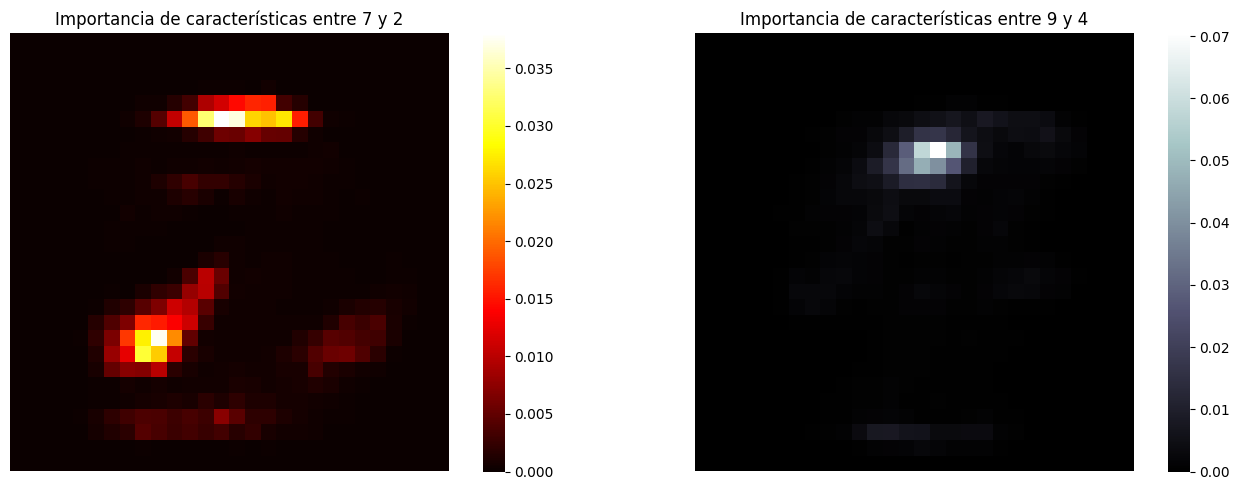

In [ ]:
importancias_72 = rf_72.feature_importances_
importancias_94 = rf_94.feature_importances_

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.heatmap(importancias_72.reshape(28, 28), cmap='hot', square=True, cbar=True)
plt.title('Importancia de características entre 7 y 2')
plt.axis('off')

plt.subplot(1, 2, 2)
sns.heatmap(importancias_94.reshape(28, 28), cmap='bone', square=True, cbar=True)
plt.title('Importancia de características entre 9 y 4')
plt.axis('off')

plt.tight_layout()
plt.show()

* Análisis para el caso 7 y 2
  * En la parte superior vemos iluminada la horizontal caracteristica del 7
  + Inferiormente hacia la izquierda vemos la importancia donde tipicamente se forma una curva del 2
  * Es importante recordar que estamos trabajando en un ambiente de muy poca resolución, entonces es posible que la parte media del 2 y el 7 se confundan facilmente


+ Análsis para el caso 9 y 4

  + En la parte superior central vemos la importancia principal
  + Justamente estaa parte es la que lleva a la confusión ya que ahí o el 4 no se cierra o su diagonal se confunde con la curva que cierra al 9
  + Nuevamente la posible razón principal de esto puede ser el ambiente de baja resolución

### ***2.1 Clasficador Global Usando Los Clasificadores Especializados***

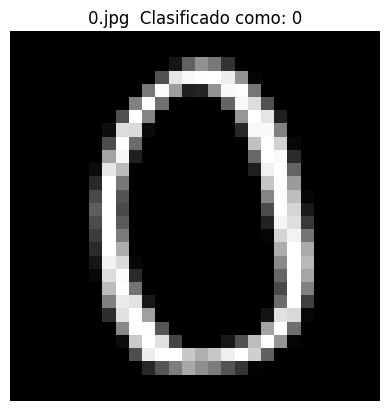

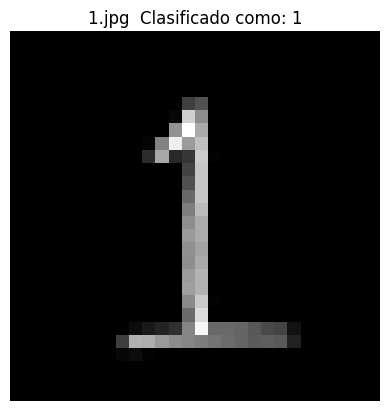

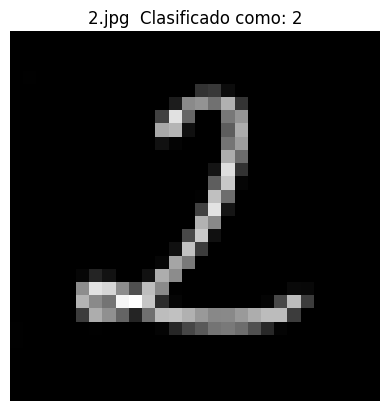

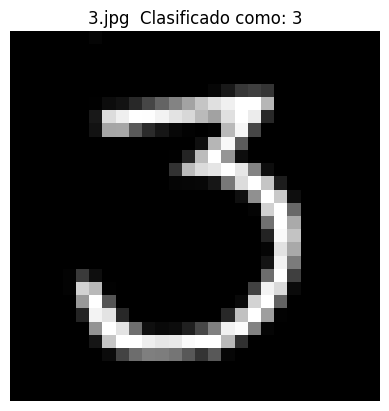

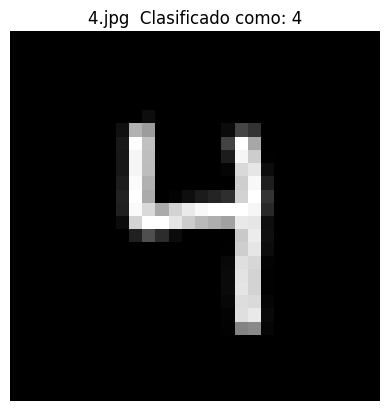

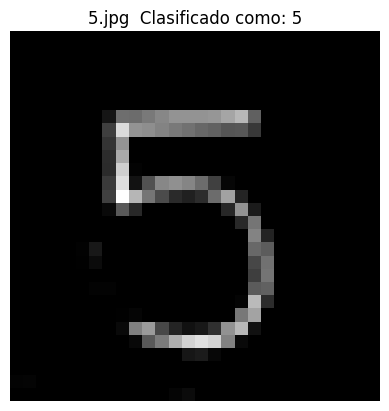

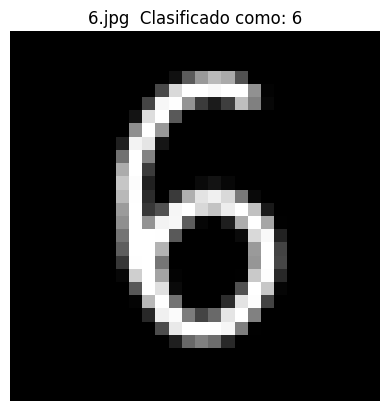

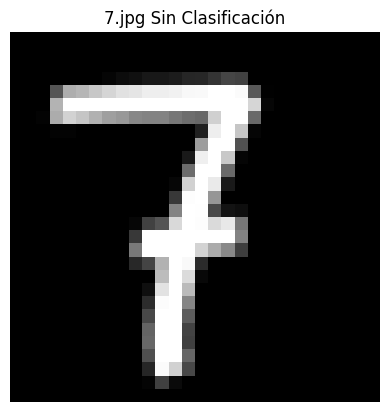

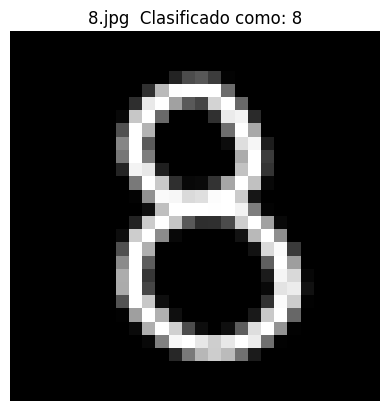

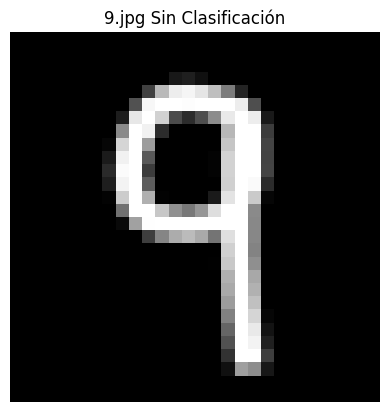

In [ ]:
clasificadores = {
    0: clf_cero,
    1: clf_uno,
    2: clf_dos,
    3: clf_tres,
    4: clf_cuatro,
    5: clf_cinco,
    6: clf_seis,
    7: clf_siete,
    8: clf_ocho,
    9: clf_nueve
}

#Función para identificar el dígito pasando por todos los modelos
def identificar_digito(imagen_df):
    for digito, clf in clasificadores.items():
        pred = clf.predict(imagen_df)
        if pred[0] == True:
            return digito
    return None  # Salir del bucle si nadie lo reconoce

#Clasificar y mostrar cada imagen con su predicción
for path in imagenes:
    X_img, img_vis = cargar_imagen(path)
    X_img_df = pd.DataFrame(X_img, columns=X_train_c.columns)
    plt.imshow(img_vis, cmap='gray')
    plt.axis('off')
    prediccion = identificar_digito(X_img_df)
    nombre_archivo = path.split("/")[-1]

    if prediccion is not None:
        plt.title(f"{nombre_archivo}  Clasificado como: {prediccion}")
    else:
        plt.title(f"{nombre_archivo} Sin Clasificación")

    plt.show()